In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [78]:
data = pd.read_csv('C:/Users/cnkum/OneDrive/Documents/Medical_Diagnosis-main/Dataset/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [79]:
data.shape

(569, 33)

In [80]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [81]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['diagnosis'], dtype='object')


In [82]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

In [83]:
data['diagnosis'] = pd.to_numeric(data['diagnosis'], errors='coerce')

In [84]:
data = pd.get_dummies(data, drop_first=True)

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [86]:
# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

Non-numeric columns: Index([], dtype='object')
                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000        NaN     0.074626      0.099770   
diagnosis                     NaN        NaN          NaN           NaN   
radius_mean              0.074626        NaN     1.000000      0.323782   
texture_mean             0.099770        NaN     0.323782      1.000000   
perimeter_mean           0.073159        NaN     0.997855      0.329533   
area_mean                0.096893        NaN     0.987357      0.321086   
smoothness_mean         -0.012968        NaN     0.170581     -0.023389   
compactness_mean         0.000096        NaN     0.506124      0.236702   
concavity_mean           0.050080        NaN     0.676764      0.302418   
concave points_mean      0.044158        NaN     0.822529      0.293464   
symmetry_mean           -0.022114        NaN     0.147741      0.071401   
fractal_dimension_mean  -0.052511        NaN    -0.31

In [87]:
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,NaN,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,0.074626,NaN,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,NaN,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,NaN,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,NaN,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,NaN,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,NaN,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,NaN,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,NaN,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


In [88]:
import seaborn as sns

<Axes: >

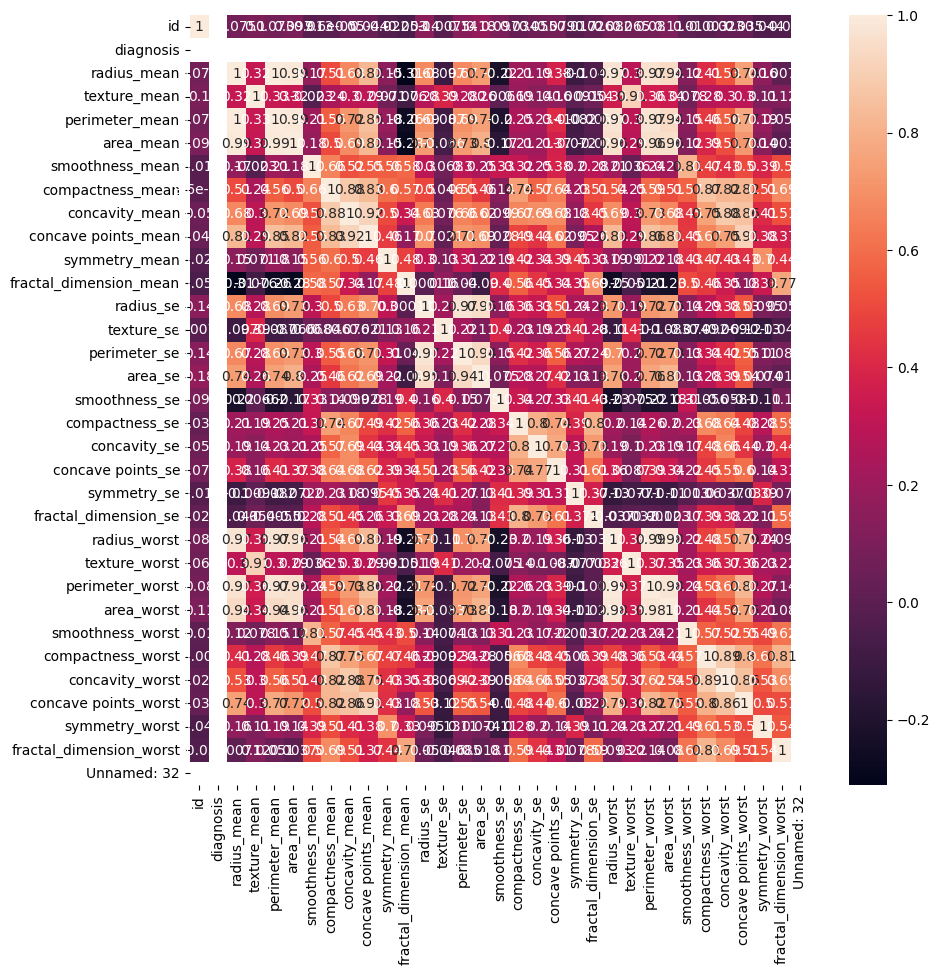

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [90]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [91]:
data.columns = data.columns.str.strip()

In [92]:
print(data.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          0        17.99         10.38          122.80     1001.0   
1    842517          0        20.57         17.77          132.90     1326.0   
2  84300903          0        19.69         21.25          130.00     1203.0   
3  84348301          0        11.42         20.38           77.58      386.1   
4  84358402          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

In [93]:
data.rename(columns={'actual_column_name': 'Outcome'}, inplace=True)

In [94]:
# Display DataFrame columns
print("Columns in DataFrame:", data.columns.to_list())

# Strip spaces in column names if necessary
data.columns = data.columns.str.strip()

# Display first few rows
print(data.head())

# If 'Outcome' column does not exist, check for similar names
if 'Outcome' not in data.columns:
    print("Column 'Outcome' not found. Available columns:", data.columns)
    # Rename if necessary
    # data.rename(columns={'similar_name': 'Outcome'}, inplace=True)

# If 'Outcome' exists, split into X and y
if 'Outcome' in data.columns:
    X = data.iloc[:, :-1]
    y = data['Outcome']
else:
    print("Please correct the column name.")

Columns in DataFrame: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          0        17.99         10.38          122.80     1001.0   
1    842517          0        20.57         17.77          132.90     1326.0   
2  84300903          0        19.69         21.25          130.00     1203.0   
3  84348301          0        11.42         20.38           77.58      386.1  

In [95]:
data.rename(columns={'outcome': 'Outcome'}, inplace=True)

In [96]:
# Extract features (X) and target (y)
X = data.iloc[:, 2:-1]  # Skipping 'id' and 'Unnamed: 32' columns
y = data['diagnosis']   # Use 'diagnosis' as the target variable

In [97]:
# X = data.iloc[:,:-1]
# y = data['Outcome']

In [108]:
print("Features (X):")
print(X.head())
print("Target (y):")
print(y.head())


Features (X):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  

In [98]:
X.shape

(569, 30)

In [99]:
y.shape

(569,)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [102]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (455, 30) (455,)
Test Set:  (114, 30) (114,)


In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
print(accuracy_score(y_test, model.predict(X_test))*100)

100.0


In [106]:
import pickle

In [107]:
pickle.dump(model, open("diabetes.pkl",'wb'))